For Projects 1-3, this report aims to use tools to analyze the purchasing history of a corporation in order to make predictions about future sales and customer behaviors for this corporation.

# PROJECT 1

In Project 1, I aimed to create a digital twin for a corporation, and in my concept, I've depicted a corporation which owns various candy stores, each selling gummies by weight. These gummies have various fruit flavors, coming in different shapes, and are also differentiated by sour or sugared flavors. After running all the code in Project 1, a randomized CSV will be created which is the basis for the reportings and findings in Projects 2 and 3.


In [29]:
# Import necessary libraries
import random
import csv
from datetime import datetime, timedelta
import pandas as pd  # Optional, useful for viewing the CSV data in Colab

In [30]:
# Attributes for candy scoops
FLAVORS = ["strawberry", "blueberry", "orange", "apple", "grape"]
SHAPES = ["worms", "bears", "rings", "hearts", "sharks"]
COATING = ["sugared", "sour"]


In [31]:
# Helper function: Generate random dates in 2024
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))


In [32]:
# Product class
class Product:
    def __init__(self, flavor, shape, coating, price):
        self.name = f"{flavor} {shape} ({coating})"
        self.price = price


In [33]:
# Order class
class Order:
    def __init__(self, order_id, customer_id):
        self.order_id = order_id
        self.customer_id = customer_id
        self.products = []  # List of Product instances

    def add_product(self, product, quantity):
        self.products.append((product, quantity))

In [34]:
# Customer class
class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []  # List of Order instances

    def place_order(self, order):
        self.orders.append(order)

In [35]:
# Store class
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = {}  # Dictionary of Customer instances by customer_id

    def get_or_create_customer(self, customer_id):
        if customer_id not in self.customers:
            self.customers[customer_id] = Customer(customer_id)
        return self.customers[customer_id]


In [60]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Helper function: Generate random datetime in 2024
def random_datetime(start, end):
    random_seconds = random.randint(0, int((end - start).total_seconds()))
    return start + timedelta(seconds=random_seconds)

# Attributes for candy scoops
FLAVORS = ["strawberry", "blueberry", "orange", "apple", "grape"]
SHAPES = ["worms", "bears", "rings", "hearts", "sharks"]
COATING = ["sugared", "sour"]

# Product class
class Product:
    def __init__(self, flavor, shape, coating, price):
        self.name = f"{flavor} {shape} ({coating})"
        self.price = price

# Order class
class Order:
    def __init__(self, order_id, customer_id):
        self.order_id = order_id
        self.customer_id = customer_id
        self.products = []  # List of Product instances

    def add_product(self, product, quantity):
        self.products.append((product, quantity))

# Customer class
class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []  # List of Order instances

    def place_order(self, order):
        self.orders.append(order)

# Store class
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = {}  # Dictionary of Customer instances by customer_id

    def get_or_create_customer(self, customer_id):
        if customer_id not in self.customers:
            self.customers[customer_id] = Customer(customer_id)
        return self.customers[customer_id]

# Corporation class
class Corporation:
    def __init__(self):
        self.stores = {}  # Dictionary of Store instances by store_id
        self.sales_data = []  # List to store sales data for CSV

    def get_or_create_store(self, store_id):
        if store_id not in self.stores:
            self.stores[store_id] = Store(store_id)
        return self.stores[store_id]

    def record_sale(self, date, time, store_id, customer_id, order_id, product_name, price, quantity):
        """Records a single sale in the sales_data list."""
        self.sales_data.append([
            date, time, store_id, customer_id, order_id, product_name, price, quantity
        ])

    def generate_sales_data(self, num_transactions=100000, num_stores=2500, customers_per_store=1000):
        """Generates sales data for the specified number of transactions."""
        start_date = datetime(2024, 1, 1)
        end_date = datetime(2024, 12, 31)

        for _ in range(num_transactions):
            # Randomly choose store and customer
            store_id = random.randint(1, num_stores)
            store = self.get_or_create_store(store_id)
            customer_id = f"CUST_{store_id}_{random.randint(1, customers_per_store)}"
            customer = store.get_or_create_customer(customer_id)
            order_id = f"{store_id}_{random.randint(10000, 99999)}"
            order = Order(order_id, customer_id)

            # Generate random date and time for purchase
            purchase_datetime = random_datetime(start_date, end_date)

            # Add random products to the order
            num_products = random.randint(1, 5)  # 1-5 products per order
            for _ in range(num_products):
                product = Product(
                    flavor=random.choice(FLAVORS),
                    shape=random.choice(SHAPES),
                    coating=random.choice(COATING),
                    price=round(random.uniform(1, 10), 2)
                )
                quantity = random.randint(1, 10)
                order.add_product(product, quantity)

                # Record the sale in the sales data
                self.record_sale(
                    purchase_datetime.date(),
                    purchase_datetime.time(),
                    store_id,
                    customer_id,
                    order_id,
                    product.name,
                    product.price,
                    quantity
                )
            customer.place_order(order)

    def save_to_csv(self, filename="candy_sales_2024.csv"):
        """Saves the sales data to a CSV file."""
        df = pd.DataFrame(self.sales_data, columns=[
            "Date", "Time", "StoreID", "CustomerID", "OrderID", "ProductName", "Price", "Quantity"
        ])
        df.to_csv(filename, index=False)
        print(f"Sales data saved to {filename}")

# Instantiate Corporation
corp = Corporation()

# Generate sales data for 100,000 transactions
corp.generate_sales_data(num_transactions=100000)

# Save the updated data to a CSV file
corp.save_to_csv("candy_sales_2024.csv")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sales data saved to candy_sales_2024.csv


In [61]:
# Instantiate the Corporation
corp = Corporation()

# Generate sales data for 100,000 transactions
corp.generate_sales_data(num_transactions=100000)

# Save the updated data to a CSV file
corp.save_to_csv("candy_sales_2024.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sales data saved to candy_sales_2024.csv


In [64]:
df = pd.read_csv("candy_sales_2024.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Time,StoreID,CustomerID,OrderID,ProductName,Price,Quantity
0,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,blueberry sharks (sour),5.86,3.0
1,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,apple rings (sour),2.77,10.0
2,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,orange sharks (sugared),9.39,5.0
3,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,orange bears (sour),9.39,3.0
4,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,apple sharks (sugared),3.19,5.0


In [ ]:
!jupyter nbconvert --to pdf CandyStore.ipynb

These output results are used for Projects 2 and 3, and are included in the Canvas submission.

# PROJECT 2

In Project 2, I used Pandas techniques to report on various trends based upon the randomized sales CSV file.

In [4]:
import pandas as pd

# Load the sales data CSV file from Project 1
sales_data = pd.read_csv('candy_sales_2024.csv')

# Show the first few rows of the data to verify
sales_data.head()

,Date,Time,StoreID,CustomerID,OrderID,ProductName,Price,Quantity
0,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,blueberry sharks (sour),5.86,3
1,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,apple rings (sour),2.77,10
2,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,orange sharks (sugared),9.39,5
3,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,orange bears (sour),9.39,3
4,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,apple sharks (sugared),3.19,5


In [36]:
# Check for missing values
sales_data.isnull().sum()

# Get basic summary statistics
sales_data.describe()

,StoreID,Price,Quantity
count,299961.000000,299961.000000,299961.000000
mean,1254.578015,5.497832,5.500675
std,722.759292,2.597153,2.864813
min,1.000000,1.000000,1.000000
25%,628.000000,3.250000,3.000000
50%,1257.000000,5.490000,5.000000
75%,1881.000000,7.750000,8.000000
max,2500.000000,10.000000,10.000000


In [37]:
#1# The most prevalent products, in customer baskets

most_prevalent_products = sales_data.groupby('ProductName').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False)

most_prevalent_products.head()  # Display top 5 most prevalent products


,Quantity
ProductName,
apple rings (sugared),33668
blueberry bears (sugared),33661
grape rings (sugared),33638
grape bears (sour),33628
grape hearts (sugared),33605


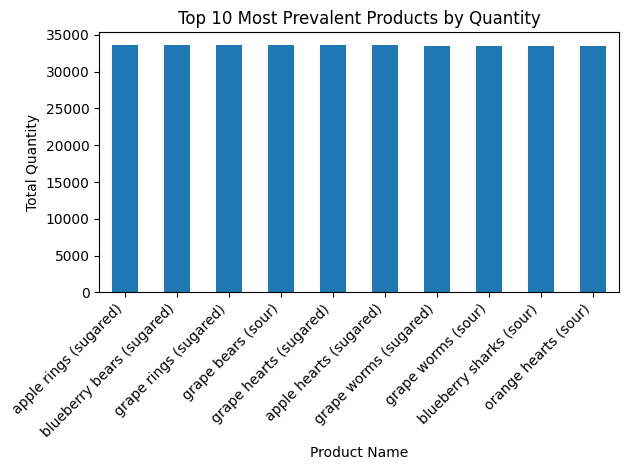

In [56]:
import matplotlib.pyplot as plt

# Plot the top 10 most prevalent products using the index (ProductName)
most_prevalent_products.head(10).plot(kind='bar', y='Quantity', legend=False)

# Customize the plot
plt.title("Top 10 Most Prevalent Products by Quantity")
plt.xlabel('Product Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for readability
plt.tight_layout()  # Adjust layout to avoid label overlap

# Show the plot
plt.show()


The most prevalent products in customers baskets are sugared apple rings, sugared blueberry bears, sugared grape rings, sour grape bears, and sugared grape hearts.

In [19]:
#2# The frequency by which customers were large buyers, or filled up large baskets

# Group sales data by CustomerID and sum the Quantity for each customer
large_basket_customers = sales_data.groupby('CustomerID').agg({
    'Quantity': 'sum'
})

# Filter customers who bought more than 50 items
large_basket_customers = large_basket_customers[large_basket_customers['Quantity'] > 10]  # Arbitrary threshold for large basket

# Total count of customers who bought over 50 items
total_large_basket_customers = large_basket_customers.shape[0]

# Display the top 5 customers with the most items bought
top_large_basket_customers = large_basket_customers.sort_values(by='Quantity', ascending=False).head()

print("Total number of customers who bought over 50 items:", total_large_basket_customers)
print("Top 5 Customers with Most Items Bought:")
print(top_large_basket_customers)


Total number of customers who bought over 50 items: 67560
Top 5 Customers with Most Items Bought:
              Quantity
CustomerID            
CUST_125_402        81
CUST_358_823        78
CUST_267_206        74
CUST_510_594        72
CUST_325_213        72


Large-basket buyers are defined here as customers who purchsed over 10 products in a basket. The frequency of which customers were large buyers is 209, meaning there was 67,560 customers who bought over 10 items per basket.

In [20]:
#3# Which stores contained the large-basket buyers, and by how much

# Group sales data by CustomerID and sum the Quantity for each customer
large_basket_customers = sales_data.groupby('CustomerID').agg({
    'Quantity': 'sum'
})

# Filter customers who bought more than 50 items
large_basket_customers = large_basket_customers[large_basket_customers['Quantity'] > 10]  # Arbitrary threshold for large basket

# Identify transactions from large-basket customers
large_basket_transactions = sales_data[sales_data['CustomerID'].isin(large_basket_customers.index)]

# Group by StoreID and CustomerID to ensure unique customer counts
large_basket_by_store = large_basket_transactions.groupby(['StoreID', 'CustomerID']).size().reset_index(name='TransactionCount')

# Count unique customers per store
unique_customers_per_store = large_basket_by_store.groupby('StoreID').agg({
    'CustomerID': 'count'
}).sort_values(by='CustomerID', ascending=False)

# Display the stores containing the large-basket buyers
print("Stores with large-basket buyers and the number of unique customers:")
print(unique_customers_per_store.head())

# Ensure the total count of unique large-basket customers is correct
total_unique_customers = unique_customers_per_store['CustomerID'].sum()
print("Total unique large-basket customers:", total_unique_customers)


Stores with large-basket buyers and the number of unique customers:
         CustomerID
StoreID            
875              45
934              44
893              43
1005             43
2475             43
Total unique large-basket customers: 67560


The stores with large-basket buyers are created in this list, and indeed the total confirms that there are 67,560 total large-basket buyers within the corporation spread across multiple stores.

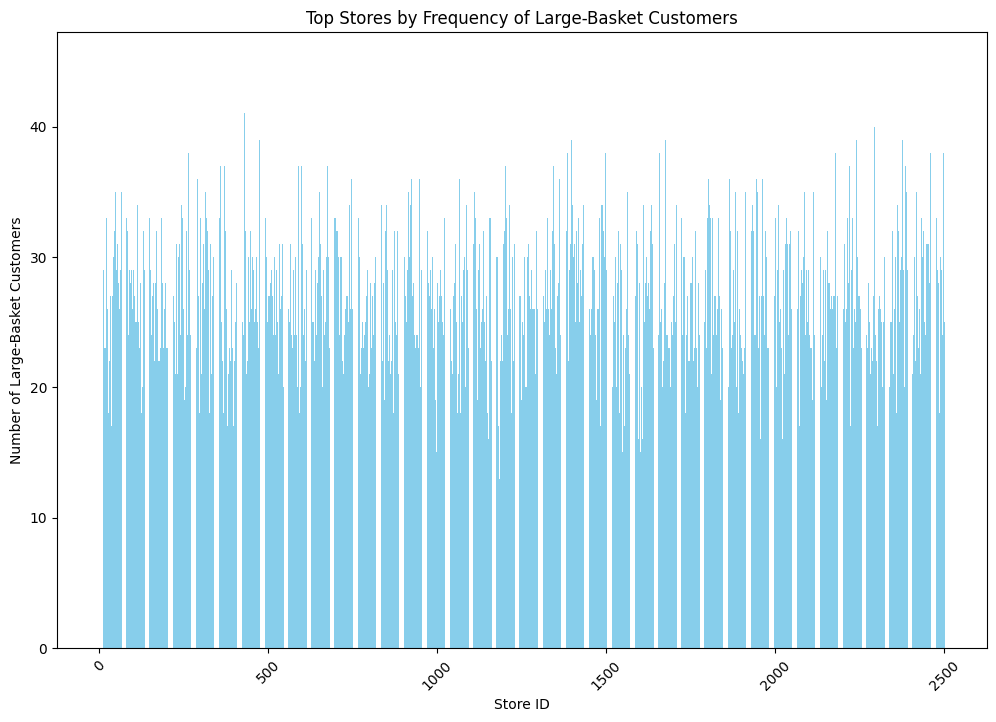

In [18]:
#4# A visualization that ranks the top, large-basket customer stores, by frequency

import matplotlib.pyplot as plt

# Assuming unique_customers_per_store is the DataFrame we previously created
# which contains the count of unique large-basket customers per store

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(unique_customers_per_store.index, unique_customers_per_store['CustomerID'], color='skyblue')
plt.xlabel('Store ID')
plt.ylabel('Number of Large-Basket Customers')
plt.title('Top Stores by Frequency of Large-Basket Customers')
plt.xticks(rotation=45)
plt.show()


This visualization shows how many big-basket buyers there are at each individual store throughout the corporation.

In [28]:
#5# A top-n list of products, which were typical to customers in this demographic

large_basket_products = sales_data[sales_data['CustomerID'].isin(large_basket_customers.index)]
top_large_basket_products = large_basket_products.groupby('ProductName').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False)

top_large_basket_products.head()


,Quantity
ProductName,
grape rings (sugared),29947
orange hearts (sour),29867
apple hearts (sugared),29858
blueberry bears (sugared),29845
grape hearts (sugared),29839


Large-basket buyers are most likely to purchase sugared grape rings, sour orange hearts, sugared apple hearts, sugared blueberry bears, and sugared grape hearts.

In [22]:
#6# A categorical approach to the above demographic – what is the categoric makeup of their baskets, on average?

large_basket_products['Flavors'] = large_basket_products['ProductName'].apply(lambda x: x.split()[0])  # Assumes flavor is first word in product name
flavor_distribution = large_basket_products.groupby('Flavors').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False)

flavor_distribution.head()


<ipython-input-22-0fe20fcdf9db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_basket_products['Flavors'] = large_basket_products['ProductName'].apply(lambda x: x.split()[0])  # Assumes flavor is first word in product name


,Quantity
Flavors,
grape,294676
apple,292357
blueberry,291354
orange,291031
strawberry,288815


Large-basket buyers are most likely to purchase flavors of gummies in grape, apple, blueberry, orange, then strawberry.

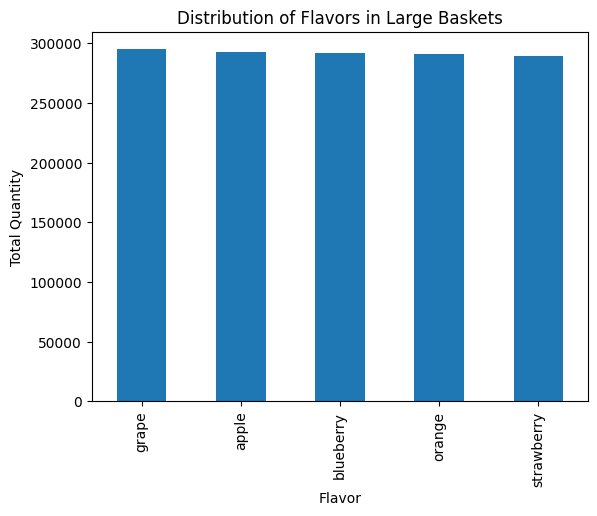

In [23]:
#7# Formulate a visualization for item 6, above

flavor_distribution.plot(kind='bar', y='Quantity', legend=False)
plt.title("Distribution of Flavors in Large Baskets")
plt.xlabel('Flavor')
plt.ylabel('Total Quantity')
plt.show()


In [75]:
!jupyter nbconvert --to pdf CandyStore2.ipynb

[NbConvertApp] Converting notebook CandyStore2.ipynb to pdf
[NbConvertApp] Support files will be in CandyStore2_files/
[NbConvertApp] Making directory ./CandyStore2_files
[NbConvertApp] Writing 58856 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 94560 bytes to CandyStore2.pdf


# PROJECT 3

In Project 3, I aimed to use market basket analysis to perform data mining to discover frequently occurring itemsets and prevalent patterns in customer purchases. The results will be interpreted to future corporation sales predictions.

In [55]:
import pandas as pd

# Load the sales data CSV file
sales_data = pd.read_csv("candy_sales_2024.csv")

# Check the first few rows of the dataset
print(sales_data.head())


         Date      Time  StoreID    CustomerID     OrderID  \
0  2024-07-07  16:43:21     1474  CUST_1474_99  1474_42898   
1  2024-07-07  16:43:21     1474  CUST_1474_99  1474_42898   
2  2024-07-07  16:43:21     1474  CUST_1474_99  1474_42898   
3  2024-01-20  20:04:47     1663  CUST_1663_62  1663_83042   
4  2024-01-20  20:04:47     1663  CUST_1663_62  1663_83042   

               ProductName  Price  Quantity  
0  blueberry sharks (sour)   5.86         3  
1       apple rings (sour)   2.77        10  
2  orange sharks (sugared)   9.39         5  
3      orange bears (sour)   9.39         3  
4   apple sharks (sugared)   3.19         5  


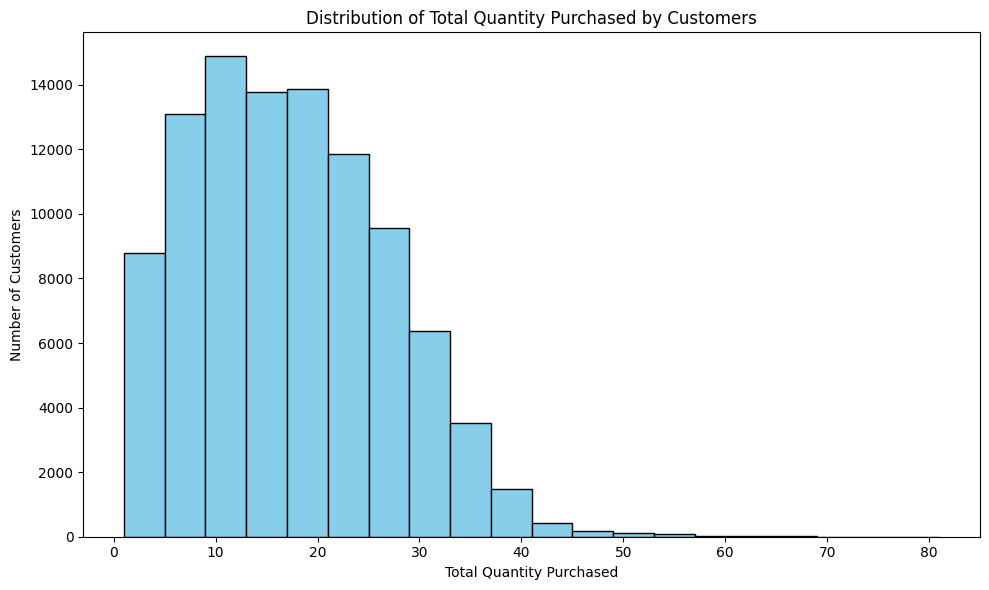

In [54]:
import matplotlib.pyplot as plt

# Group sales data by CustomerID and sum the Quantity for each customer
customer_purchases = sales_data.groupby('CustomerID').agg({
    'Quantity': 'sum'
})

# Plotting the histogram of the number of customers against total quantity purchased
plt.figure(figsize=(10, 6))  # Set figure size for readability
plt.hist(customer_purchases['Quantity'], bins=20, color='skyblue', edgecolor='black')

# Customize the plot
plt.title("Distribution of Total Quantity Purchased by Customers")
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Number of Customers')

# Show the plot
plt.tight_layout()
plt.show()


This histogram depicts the number of customers who purchased a certain amount of items in their basket at once. Using this histogram, we can predict that customers are more likely to purchase between 10-20 items in their basket at a time.

In [57]:
## Best Selling Item in Corporation

# Group by ProductName and calculate the total quantity sold across all stores
best_selling_product_corp = sales_data.groupby('ProductName').agg({
    'Quantity': 'sum'
}).reset_index()

# Find the best-selling product across all stores
best_selling_product_corp = best_selling_product_corp.loc[best_selling_product_corp['Quantity'].idxmax()]

# Display the result
print("Best-selling product across the entire corporation:")
print(best_selling_product_corp[['ProductName', 'Quantity']])


Best-selling product across the entire corporation:
ProductName    apple rings (sugared)
Quantity                       33668
Name: 5, dtype: object


The single best selling item in the corporation is sugared apple rings. We can predict that overall, the most popular product is sugared apple rings for the whole corporation.

In [58]:
## Best Selling Item Per Store

# Load the sales data CSV file
sales_data = pd.read_csv("candy_sales_2024.csv")

# Remove duplicates if any
sales_data.drop_duplicates(inplace=True)

# Group by StoreID and ProductName to get the total quantity sold for each product in each store
best_selling_per_store = sales_data.groupby(['StoreID', 'ProductName']).agg({
    'Quantity': 'sum'
}).reset_index()

# Find the best-selling product for each store by sorting by quantity and picking the top one
best_selling_store = best_selling_per_store.loc[best_selling_per_store.groupby('StoreID')['Quantity'].idxmax()]

# Display the result
print(best_selling_store[['StoreID', 'ProductName', 'Quantity']])


        StoreID                  ProductName  Quantity
22            1       grape hearts (sugared)        38
88            2      strawberry rings (sour)        40
104           3      blueberry hearts (sour)        47
151           4    blueberry rings (sugared)        36
213           5          orange rings (sour)        34
...         ...                          ...       ...
112804     2496      blueberry hearts (sour)        46
112886     2497  strawberry sharks (sugared)        43
112892     2498       apple hearts (sugared)        30
112960     2499       orange bears (sugared)        33
113018     2500  strawberry hearts (sugared)        35

[2500 rows x 3 columns]


This list shows every single store and the best-selling item for that store. This information can be used to predict how much stores need to be stocked of their popular items.

In [59]:
# Ensure mlxtend is installed
!pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the sales data into a DataFrame
sales_data = pd.read_csv('candy_sales_2024.csv')

# Step 1: Prepare the Data
# Group by OrderID and ProductName to get the quantity of each product in each order
basket = sales_data.groupby(['OrderID', 'ProductName'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('OrderID')

# Encode the quantities as 1 (purchased) or 0 (not purchased) and convert to boolean type
basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(bool)

# Step 2: Apply Apriori Algorithm
# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Step 3: Filter itemsets of at least size 2
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]

# Ensure the frequent itemsets DataFrame is not empty
if not frequent_itemsets.empty:
    # Sort the frequent itemsets by support in descending order
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

    # Display the sorted frequent itemsets
    print(frequent_itemsets.head())

    # Step 4: Generate Association Rules with support_only=True
    # Generate association rules from the frequent itemsets
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0, support_only=True, num_itemsets=len(frequent_itemsets))

    # Sort the rules by support in descending order
    rules = rules.sort_values(by='support', ascending=False)

    # Display the sorted association rules
    print("\nAssociation Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'lift']])

    # Save the results to CSV files
    frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
    rules.to_csv('association_rules.csv', index=False)
    print("Results saved to CSV files.")
else:
    print("No frequent itemsets found. Try adjusting the min_support parameter further.")


<ipython-input-59-b9879ce92e21>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(bool)


       support                                         itemsets
542   0.003651  (grape bears (sour), blueberry bears (sugared))
1124  0.003581   (orange hearts (sour), orange rings (sugared))
897   0.003551    (grape hearts (sugared), grape hearts (sour))
149   0.003551     (apple rings (sugared), apple hearts (sour))
1096  0.003531  (strawberry hearts (sour), orange bears (sour))

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, lift]
Index: []
Results saved to CSV files.


This frequent itemsets CSV file lists every most-frequently occurring set of items. This means that the items most commonly bought together are the sour grape bears paired with the sugared blueberry bears, which occured 0.003651% of the time, out of the total 100,000 transactions in the sales CSV.

In conclusion, this entire project created, analyzed, and data mined information for a corporation. Using tools and methods learned in this course, I was able to draw information out of Python and Pandas which depicted sales patterns for this corporation.